# priceの対数化による精度の確認

In [94]:
%matplotlib inline
from IPython.core.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #3D散布図の描画
import itertools #組み合わせを求めるときに使う
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pyper #pyperとRを事前にインストールしておく必要がある
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <a list of 10 Patch objects>)

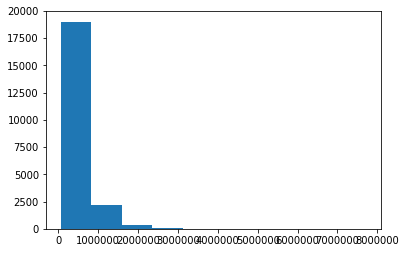

In [128]:
# priceのヒストグラム
df = pd.read_csv("kc_house_data.csv")
plt.hist(df["price"])

(array([6.300e+01, 5.330e+02, 3.977e+03, 7.183e+03, 6.345e+03, 2.541e+03,
        7.330e+02, 1.930e+02, 3.800e+01, 7.000e+00]),
 array([11.22524339, 11.68839214, 12.15154089, 12.61468964, 13.07783839,
        13.54098714, 14.00413589, 14.46728464, 14.93043339, 15.39358214,
        15.85673089]),
 <a list of 10 Patch objects>)

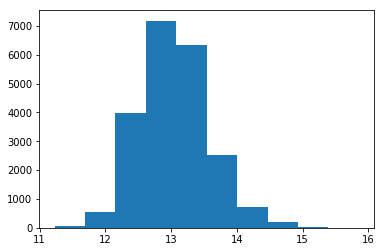

In [110]:
# 対数のヒストグラム
df_log = pd.read_csv("kc_house_data.csv")
df_log["price"] = df_log["price"].apply( lambda x: np.log(x) )
plt.hist(df_log["price"])

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <a list of 10 Patch objects>)

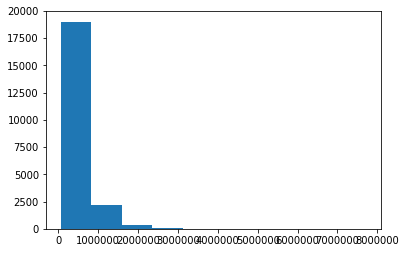

In [111]:
# 念のため元に戻して同じになるか確認
df = df_log
df["price"] = df["price"].apply( lambda x: np.exp(x) )
plt.hist(df["price"])

以下の4パターンで確認
- 線形回帰、ランダムフォレスト回帰
- 通常price、対数化price

In [115]:
# (1)線形回帰、通常price
df = pd.read_csv("kc_house_data.csv")
X = df.drop(["id", "price", "zipcode", "date", "sqft_living"], axis=1)
y = df["price"]

# データを訓練データ80%、テストデータ20%に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 線形回帰
regr = LinearRegression()
regr.fit(X_train, y_train)

# 訓練データでの学習、MAEの計算
y_pred = regr.predict(X_train)
display(y_pred[:10])
mae = mean_absolute_error(y_train, y_pred)
print(" Train MAE: %s"%round(mae,3))
score = regr.score(X_train, y_train)
print(" Train SCR: %s"%round(score,3))

# テストデータでMAEの計算
y_pred = regr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(" Test  MAE: %s"%round(mae,3))
score = regr.score(X_test, y_test)
print(" Test  SCR: %s"%round(score,3))

array([ 494097.57016755,  247982.2550895 ,  164117.49424183,
        363041.36909987,  536594.80677808,  472537.07525462,
        509181.30403286, 1059491.07360271,  541901.83197424,
        200981.07252076])

 Train MAE: 125369.435
 Train SCR: 0.695
 Test  MAE: 128157.32
 Test  SCR: 0.696


In [114]:
# (2)線形回帰、対数化price
df_log = pd.read_csv("kc_house_data.csv")
df_log["price"] = df_log["price"].apply( lambda x: np.log(x) ) # log関数で変換
X = df_log.drop(["id", "price", "zipcode", "date", "sqft_living"], axis=1)
y = df_log["price"]

# データを訓練データ80%、テストデータ20%に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 線形回帰
regr = LinearRegression()
regr.fit(X_train, y_train)

# 訓練データでの学習、MAEの計算
y_pred = regr.predict(X_train)
mae = mean_absolute_error(np.exp(y_train), np.exp(y_pred))
print(" Train MAE: %s"%round(mae,3))
score = regr.score(X_train, y_train)
print(" Train SCR: %s"%round(score,3))

# テストデータでMAEの計算
y_pred = regr.predict(X_test)
mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred))
print(" Test  MAE: %s"%round(mae,3))
score = regr.score(X_test, y_test)
print(" Test  SCR: %s"%round(score,3))

 Train MAE: 110375.5
 Train SCR: 0.768
 Test  MAE: 118055.423
 Test  SCR: 0.768


In [116]:
# (3)ランダムフォレスト回帰、通常price
df = pd.read_csv("kc_house_data.csv")
X = df.drop(["id", "price", "zipcode", "date", "sqft_living"], axis=1)
y = df["price"]

# データを訓練データ80%、テストデータ20%に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 線形回帰
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

# 訓練データでの学習、MAEの計算
y_pred = regr.predict(X_train)
display(y_pred[:10])
mae = mean_absolute_error(y_train, y_pred)
print(" Train MAE: %s"%round(mae,3))
score = regr.score(X_train, y_train)
print(" Train SCR: %s"%round(score,3))

# テストデータでMAEの計算
y_pred = regr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(" Test  MAE: %s"%round(mae,3))
score = regr.score(X_test, y_test)
print(" Test  SCR: %s"%round(score,3))

array([367285., 278500., 225425., 283500., 453800., 461920., 454000.,
       821410., 636100., 296145.])

 Train MAE: 30265.644
 Train SCR: 0.973
 Test  MAE: 80251.373
 Test  SCR: 0.834


In [118]:
# (4)ランダムフォレスト回帰、対数化price
df_log = pd.read_csv("kc_house_data.csv")
df_log["price"] = df_log["price"].apply( lambda x: np.log(x) ) # log関数で変換
X = df_log.drop(["id", "price", "zipcode", "date", "sqft_living"], axis=1)
y = df_log["price"]

# データを訓練データ80%、テストデータ20%に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 線形回帰
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

# 訓練データでの学習、MAEの計算
y_pred = regr.predict(X_train)
display(y_pred[:10])
mae = mean_absolute_error(np.exp(y_train), np.exp(y_pred))
print(" Train MAE: %s"%round(mae,3))
score = regr.score(X_train, y_train)
print(" Train SCR: %s"%round(score,3))

# テストデータでMAEの計算
y_pred = regr.predict(X_test)
mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred))
print(" Test  MAE: %s"%round(mae,3))
score = regr.score(X_test, y_test)
print(" Test  SCR: %s"%round(score,3))

array([12.71881448, 12.49218709, 12.32147631, 12.58667717, 13.10941726,
       13.07930049, 13.06246986, 13.51148016, 13.39473275, 12.5896562 ])

 Train MAE: 31082.619
 Train SCR: 0.974
 Test  MAE: 79002.165
 Test  SCR: 0.873


(4)ランダムフォレスト回帰、対数化price

の結果が一番よさそう。
交差検証でも確認してみる。
cross_val_score
という便利な関数があるもよう。

In [123]:
# (1)線形回帰、通常price
df = pd.read_csv("kc_house_data.csv")
X = df.drop(["id", "price", "zipcode", "date", "sqft_living"], axis=1)
y = df["price"]

# 線形回帰
regr = LinearRegression()
scores = cross_val_score(regr, X, y, cv=10)
print("SCR: %s"%scores.mean())

SCR: 0.6908930054058809


In [124]:
# (2)線形回帰、対数化price
df_log = pd.read_csv("kc_house_data.csv")
df_log["price"] = df_log["price"].apply( lambda x: np.log(x) ) # log関数で変換
X = df_log.drop(["id", "price", "zipcode", "date", "sqft_living"], axis=1)
y = df_log["price"]

# 線形回帰
regr = LinearRegression()
scores = cross_val_score(regr, X, y, cv=10)
print("SCR: %s"%scores.mean())

SCR: 0.7639515268396393


In [125]:
# (3)ランダムフォレスト回帰、通常price
df = pd.read_csv("kc_house_data.csv")
X = df.drop(["id", "price", "zipcode", "date", "sqft_living"], axis=1)
y = df["price"]

# ランダムフォレスト回帰
regr = RandomForestRegressor()
scores = cross_val_score(regr, X, y, cv=10)
print("SCR: %s"%scores.mean())

SCR: 0.8528699993765277


In [126]:
# (4)ランダムフォレスト回帰、対数化price
df_log = pd.read_csv("kc_house_data.csv")
df_log["price"] = df_log["price"].apply( lambda x: np.log(x) ) # log関数で変換
X = df_log.drop(["id", "price", "zipcode", "date", "sqft_living"], axis=1)
y = df_log["price"]

# ランダムフォレスト回帰
regr = RandomForestRegressor()
scores = cross_val_score(regr, X, y, cv=10)
print("SCR: %s"%scores.mean())

SCR: 0.8732878974448516


交差検証でも、

(4)ランダムフォレスト回帰、対数化price

の結果が一番よいことが分かった。